In [3]:
import numpy as np 
import pandas as pd 

import random
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input/trends-assessment-prediction/'):
    for filename in filenames:
        print(filename)
    break


train_scores.csv
sample_submission.csv
fnc.csv
fMRI_mask.nii
loading.csv
reveal_ID_site2.csv
ICN_numbers.csv


In [4]:
features = pd.read_csv("/kaggle/input/trends-assessment-prediction/train_scores.csv")
loading_data = pd.read_csv("/kaggle/input/trends-assessment-prediction/loading.csv")
fnc = pd.read_csv("/kaggle/input/trends-assessment-prediction/fnc.csv")
reveal_ID_site = pd.read_csv("/kaggle/input/trends-assessment-prediction/reveal_ID_site2.csv")
icn_data = pd.read_csv("/kaggle/input/trends-assessment-prediction/ICN_numbers.csv")

In [5]:
features.head(5)

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630           NaN           NaN     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

In [6]:
loading_data.head(5)

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10001  0.006070  0.014466  0.004136  0.000658 -0.002742  0.005033   
1  10002  0.009087  0.009291  0.007049 -0.002076 -0.002227  0.004605   
2  10003  0.008151  0.014684  0.010444 -0.005293 -0.002913  0.015042   
3  10004  0.004675  0.000957  0.006154 -0.000429 -0.001222  0.011755   
4  10005 -0.000398  0.006878  0.009051  0.000369  0.000336  0.010679   

      IC_10     IC_09     IC_18  ...     IC_08     IC_03     IC_21     IC_28  \
0  0.016720  0.003484  0.001797  ...  0.018246  0.023711  0.009177 -0.013929   
1  0.012277  0.002946  0.004086  ...  0.014635  0.022556  0.012004 -0.011814   
2  0.017745  0.003930 -0.008021  ...  0.019565  0.030616  0.018184 -0.010469   
3  0.013010  0.000193  0.008075  ...  0.002658  0.022266  0.005956 -0.010595   
4  0.010352  0.003637  0.004180  ...  0.009702  0.017257  0.005454 -0.008591   

      IC_11     IC_20     IC_30     IC_22     IC_29     IC_14  
0  0.030696  0.010496  0.002892 -0.023235  0.022177  0.017192  
1  0.022479  0.005739  0.002880 -0.016609  0.025543  0.014524  
2  0.029799  0.015435  0.005211 -0.028882  0.031427  0.018164  
3  0.024078 -0.000319  0.005866 -0.015182  0.024476  0.014760  
4  0.019416  0.000786  0.002692 -0.019814  0.017105  0.013316  

[5 rows x 27 columns]

In [7]:
fnc.head(5)

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
0  10001            0.368580            0.166876            0.438148   
1  10002            0.151696           -0.024819            0.217504   
2  10003            0.343415            0.109974            0.741641   
3  10004            0.132793            0.258255            0.490769   
4  10005            0.291921            0.251254            0.416470   

   SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
0            0.341007           -0.186251            0.049096   
1            0.418072           -0.227234           -0.064052   
2            0.578558           -0.676446           -0.436960   
3            0.342717            0.091112            0.107969   
4            0.511719           -0.362626           -0.164710   

   SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...  \
0           0.121417          -0.174268          -0.231578  ...   
1          -0.143832          -0.118116          -0.054825  ...   
2          -0.295663          -0.377790          -0.344963  ...   
3           0.029220          -0.026237           0.094742  ...   
4          -0.289059          -0.015537          -0.087316  ...   

   CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  CBN(4)_vs_DMN(94)  \
0           -0.149279            0.552841           0.131046   
1           -0.214216           -0.039792           0.143014   
2           -0.154941            0.136850          -0.022361   
3           -0.130339            0.309540           0.141469   
4           -0.139525            0.394932           0.040443   

   CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  CBN(4)_vs_CBN(13)  \
0           0.335446            0.394867          -0.042853   
1          -0.189962            0.498373           0.444231   
2           0.137625            0.677972           0.409412   
3           0.030853            0.344394           0.214097   
4           0.428334            0.498837           0.266755   

   CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  CBN(7)_vs_CBN(4)  
0           0.124627          -0.060712           0.515964          0.290488  
1           0.592438           0.028649           0.705524          0.248327  
2           0.563892           0.438684           0.618204          0.284474  
3           0.317556           0.012435           0.665937          0.081358  
4           0.227379           0.028984           0.752343          0.087898  

[5 rows x 1379 columns]

In [8]:
train_data.isnull().sum()

NameError: name 'train_data' is not defined

In [7]:
# Downloading the template 
!wget https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii

--2020-08-25 05:43:46--  https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chaogan-Yan/DPABI/master/Templates/ch2better.nii [following]
--2020-08-25 05:43:46--  https://raw.githubusercontent.com/Chaogan-Yan/DPABI/master/Templates/ch2better.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.64.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35193272 (34M) [application/octet-stream]
Saving to: ‘ch2better.nii’

ch2better.nii       100%[===================>]  33.56M  10.8MB/s    in 3.4s    

2020-08-25 05:43:51 (9.79 MB/s) - ‘ch2better.nii’ saved [35193272/35193272]



In [8]:
import h5py
import nilearn as nl
from nilearn import image
from nilearn import plotting
import nilearn.plotting as nlplt

In [9]:
fmri_mask = '../input/trends-assessment-prediction/fMRI_mask.nii'
mask_img = nl.image.load_img(fmri_mask)

In [10]:

smri = "ch2better.nii"

def load_subject(filename, mask_img):
    subject_data = None
    with h5py.File(filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    subject_data = np.moveaxis(subject_data, [0, 1, 2, 3], [3, 2, 1, 0])
    subject_img = nl.image.new_img_like(mask_img, subject_data, affine = mask_img.affine, copy_header = True)
    
    return subject_img

### Plotting 4D probabilistic atlas maps

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps


/opt/conda/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
/opt/conda/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------


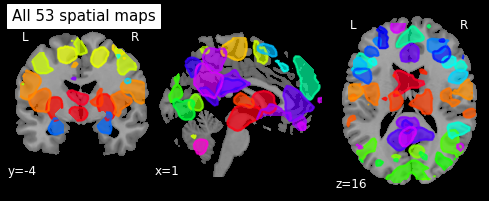

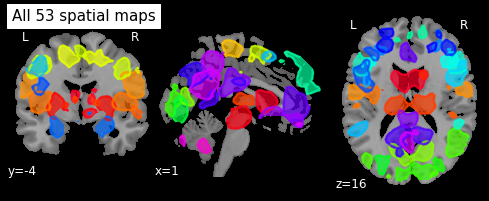

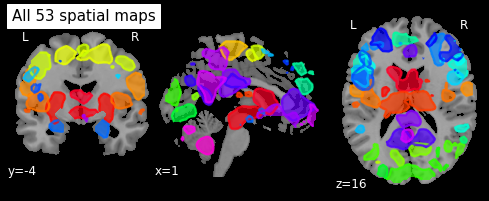

In [11]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)

for file in files:
    subject_path = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject_path, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    nlplt.plot_prob_atlas(subject_img, bg_img=smri, view_type='filled_contours',
                          draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')
    print("-"*50)

### Plotting a statistical map

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
(53, 63, 52)
--------------------------------------------------


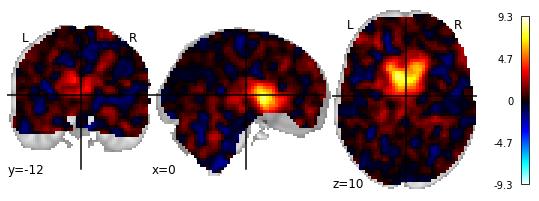

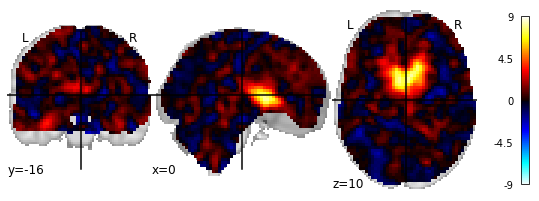

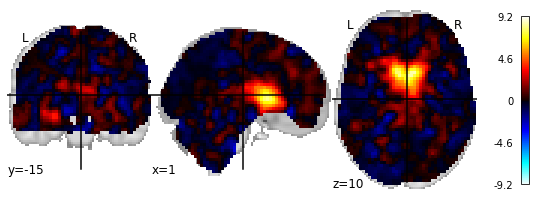

In [12]:
files = random.choices(os.listdir("../input/trends-assessment-prediction/fMRI_train/"), k = 3)

for file in files:
    subject_path = os.path.join("../input/trends-assessment-prediction/fMRI_train/", file)
    subject_img = load_subject(subject_path, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    first_rsn = image.index_img(subject_img, 0)
    print(first_rsn.shape)
    plotting.plot_stat_map(first_rsn)
    print("-"*50)

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------
Image shape is (53, 63, 52, 53)
Detected 53 spatial maps
--------------------------------------------------


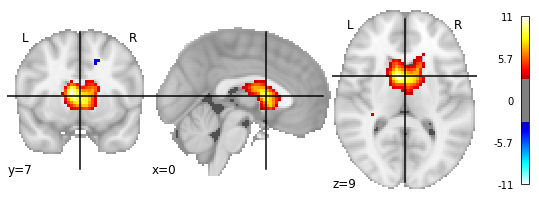

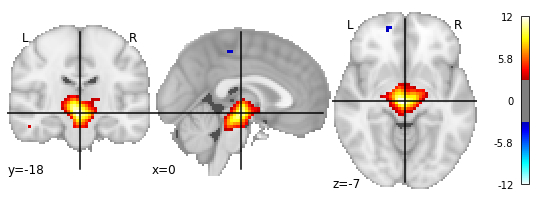

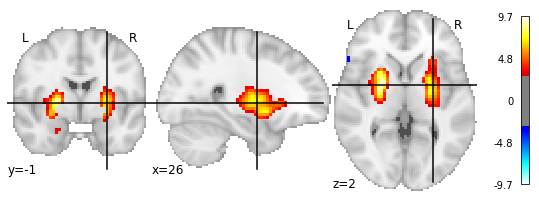

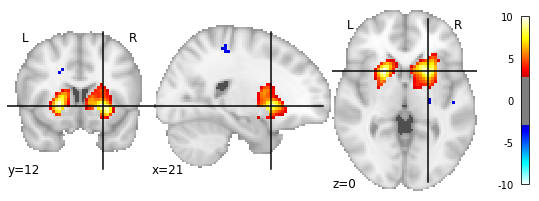

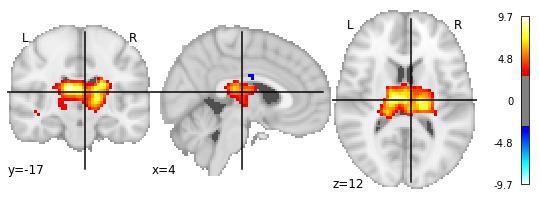

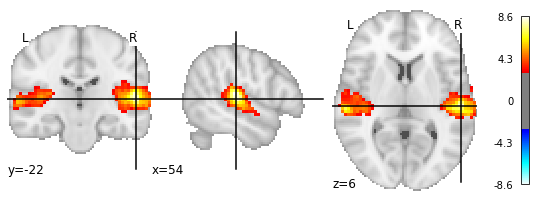

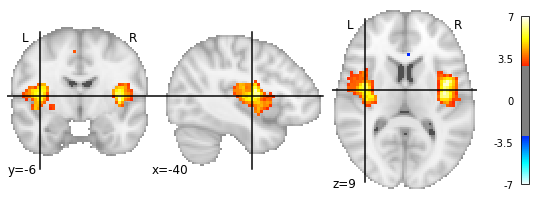

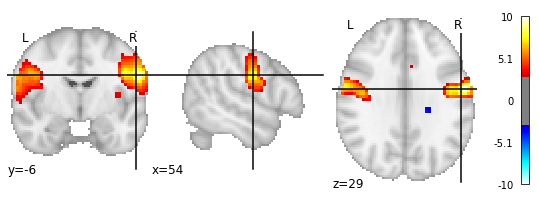

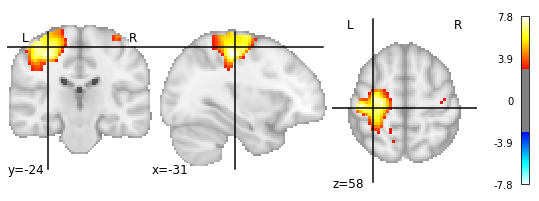

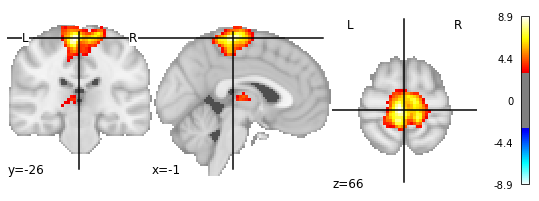

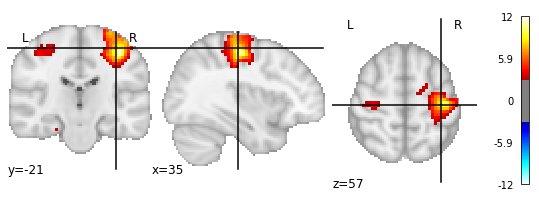

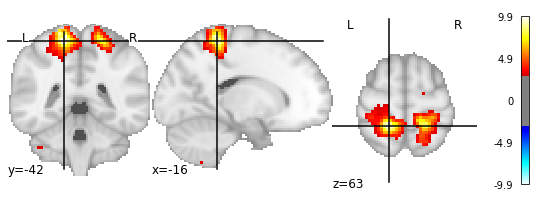

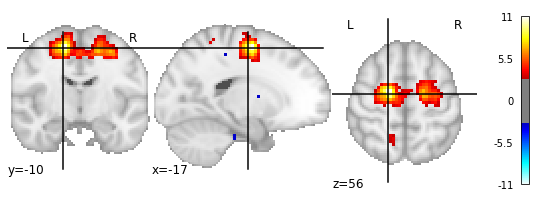

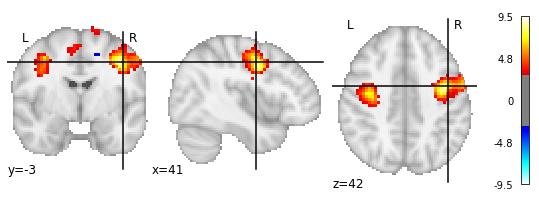

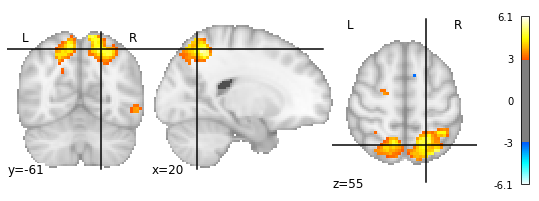

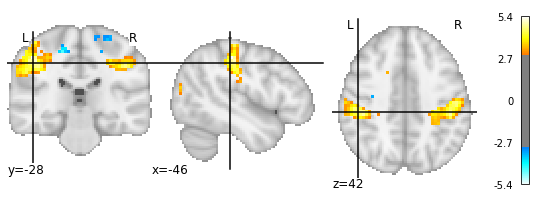

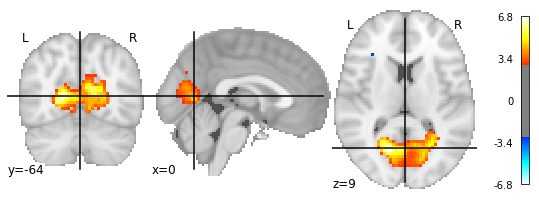

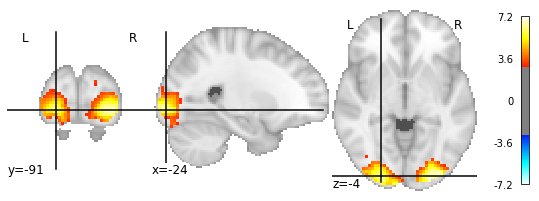

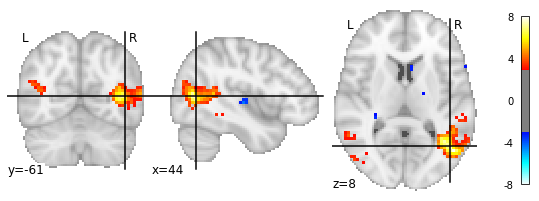

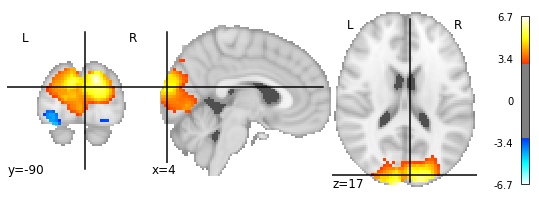

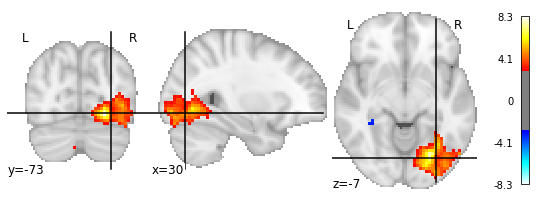

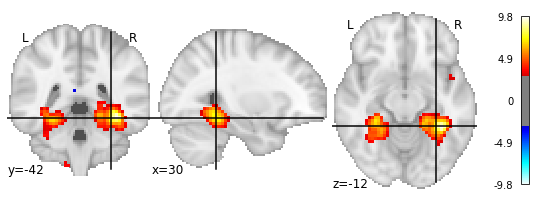

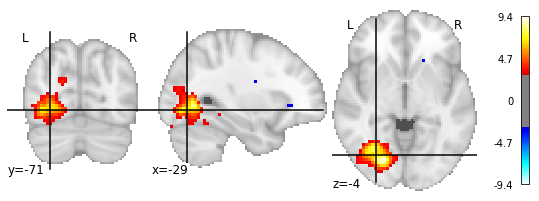

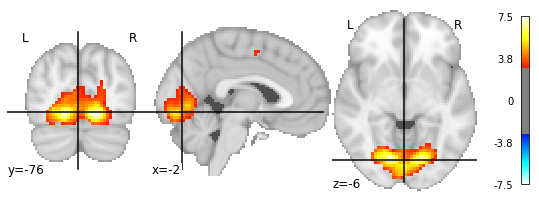

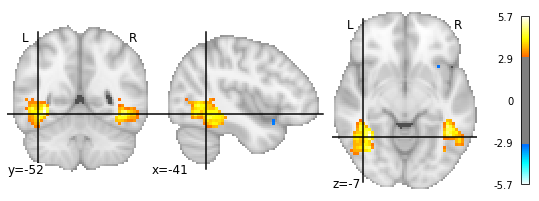

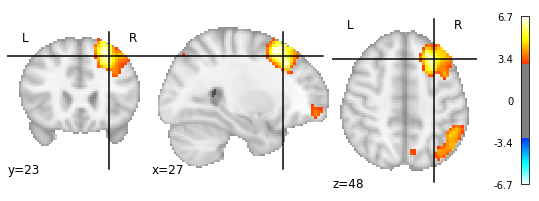

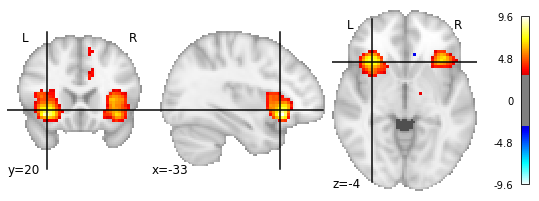

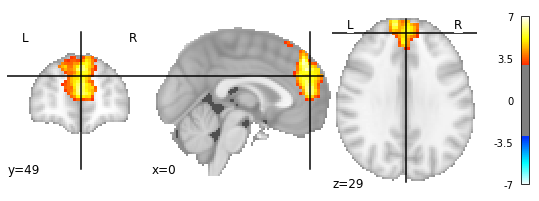

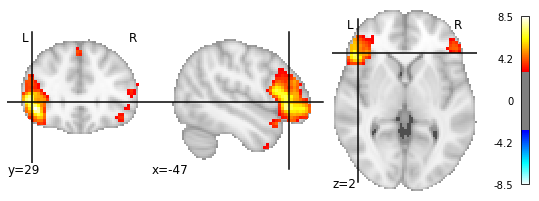

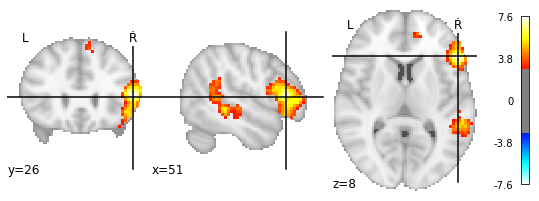

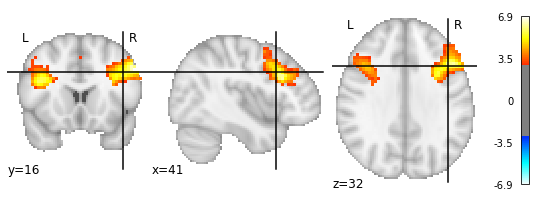

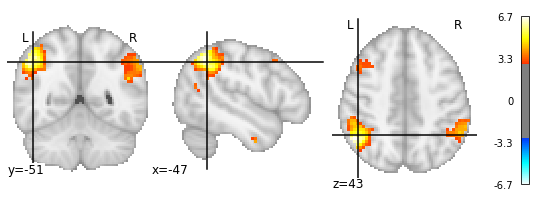

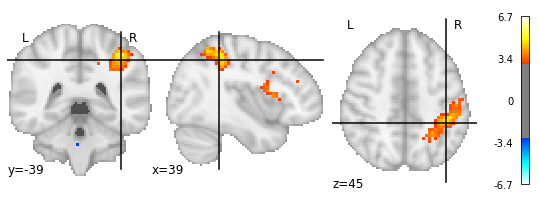

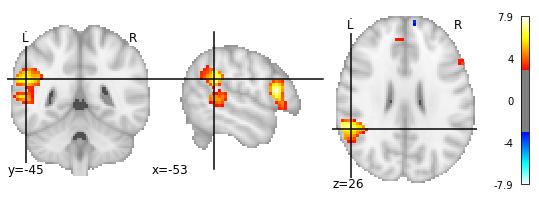

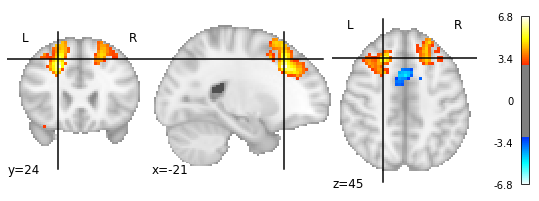

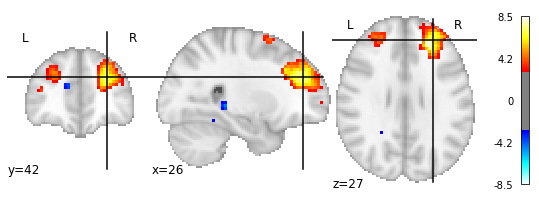

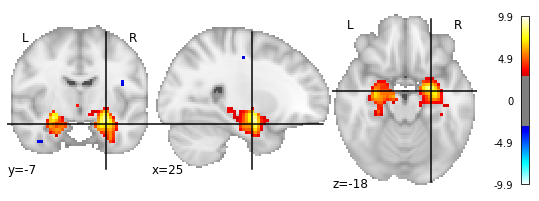

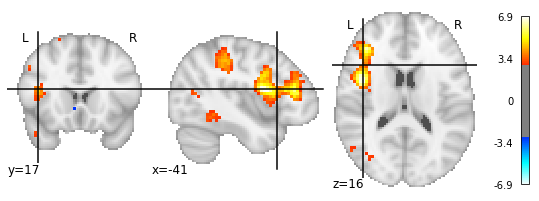

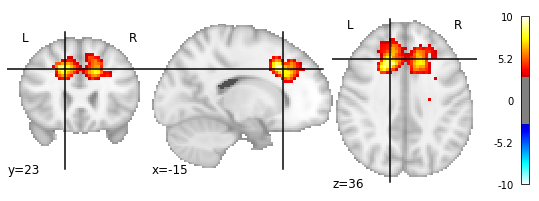

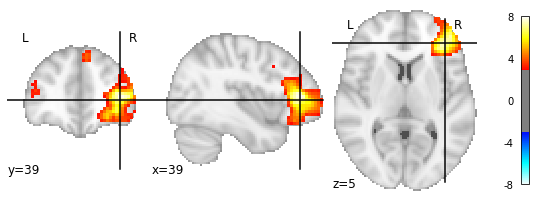

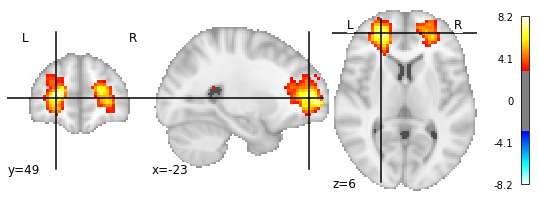

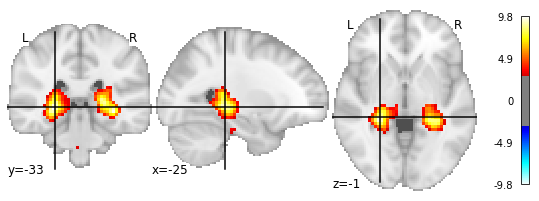

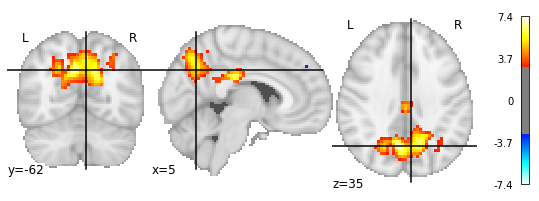

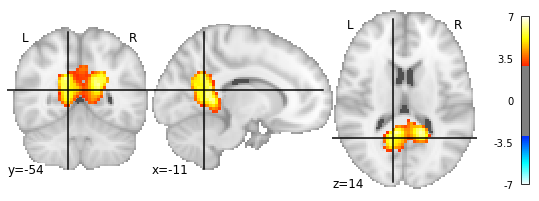

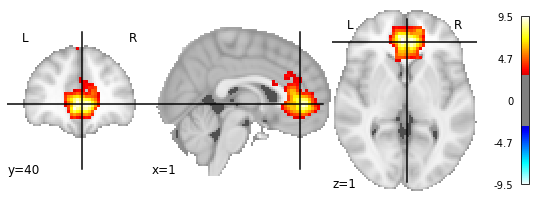

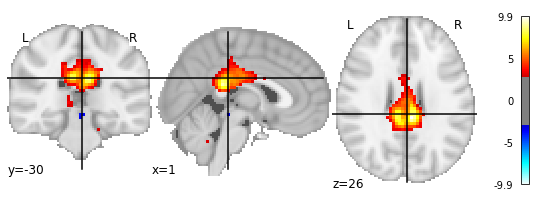

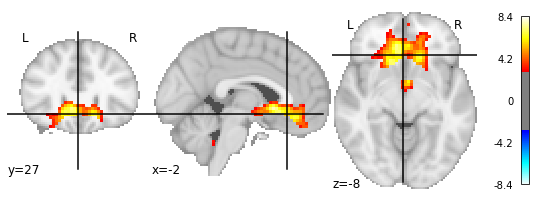

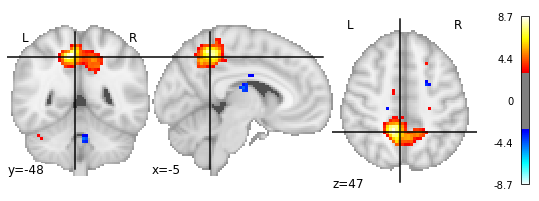

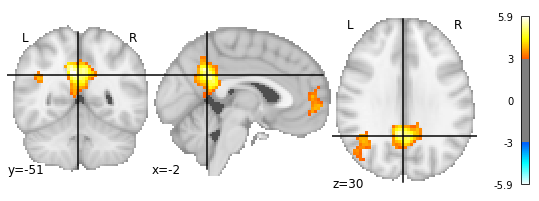

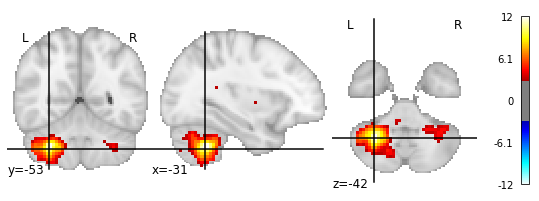

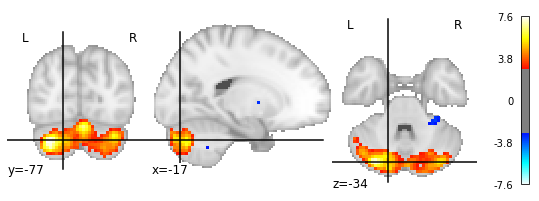

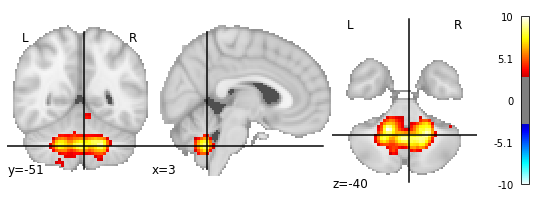

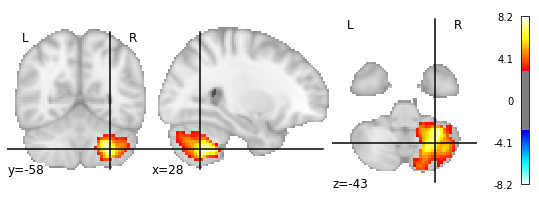

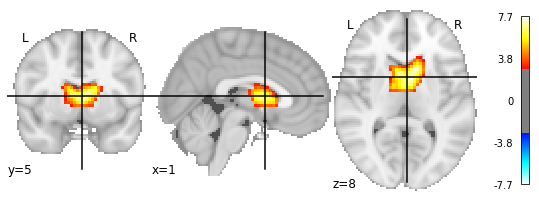

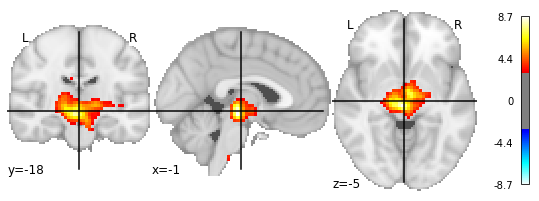

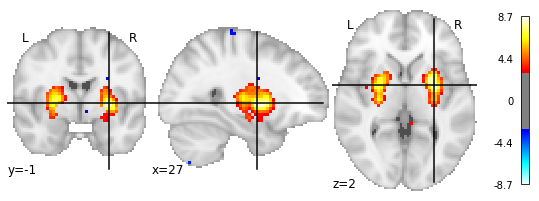

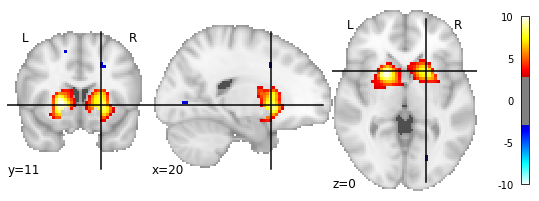

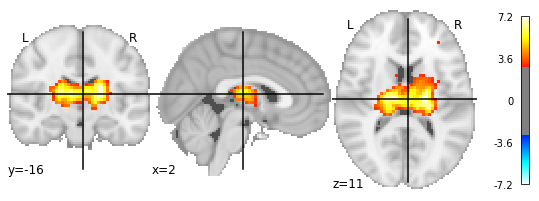

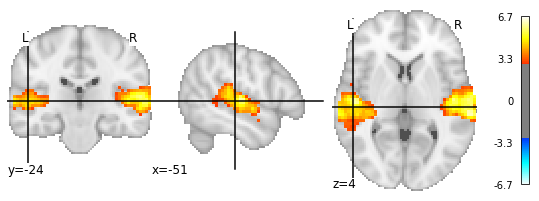

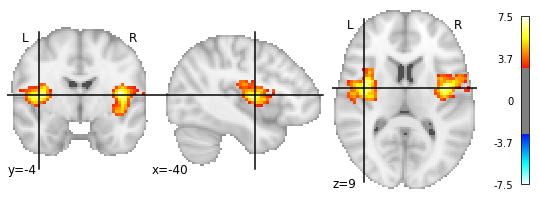

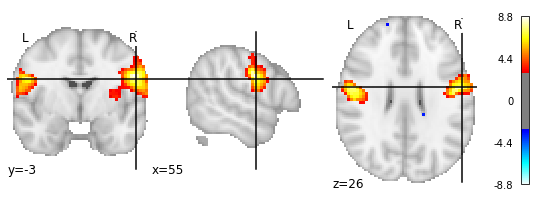

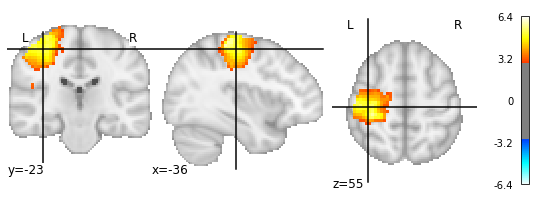

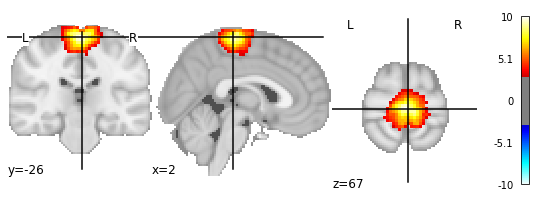

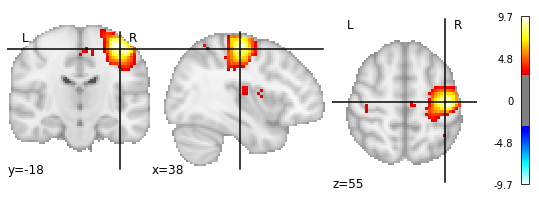

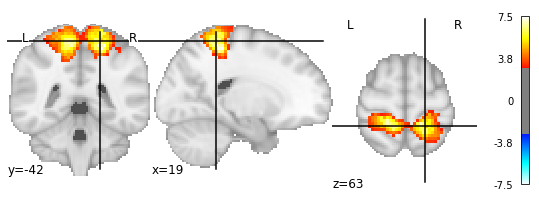

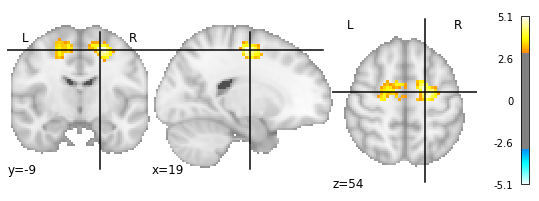

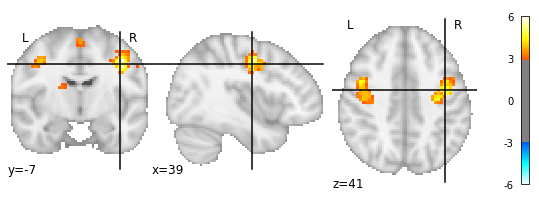

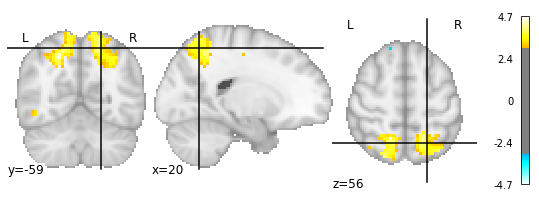

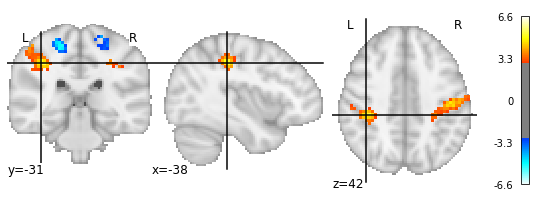

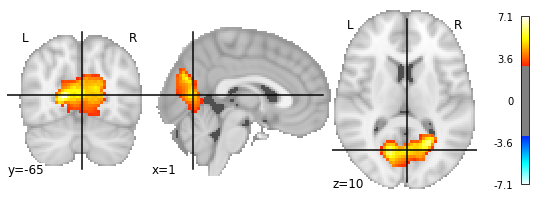

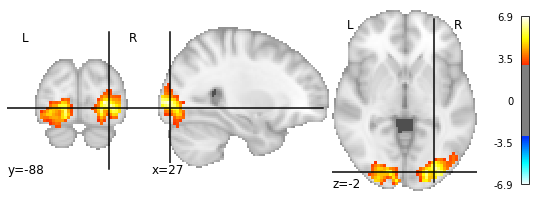

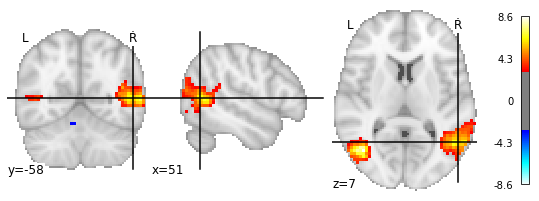

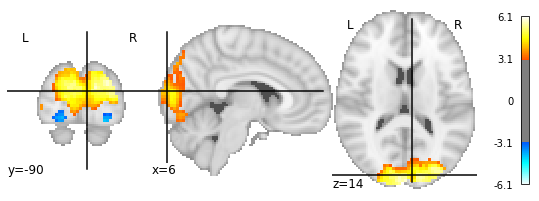

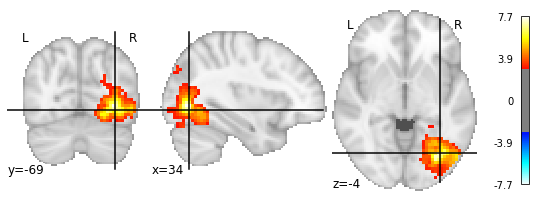

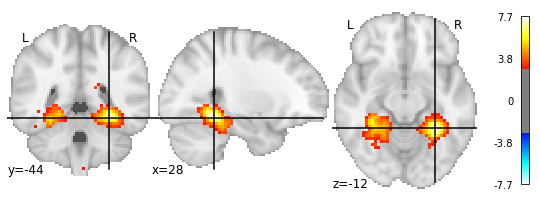

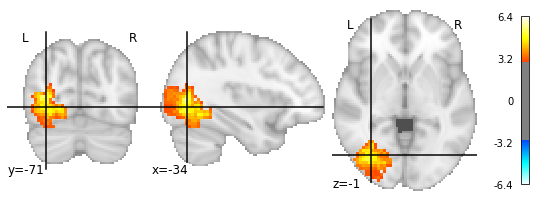

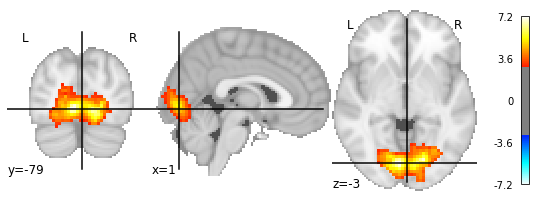

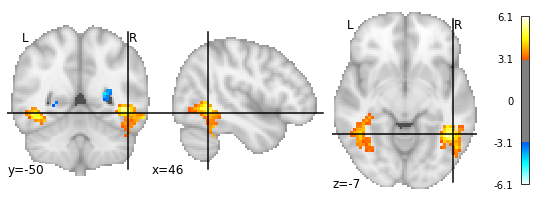

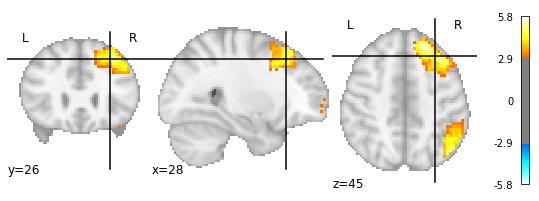

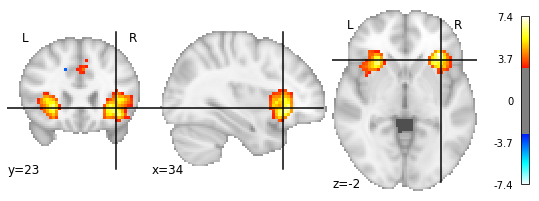

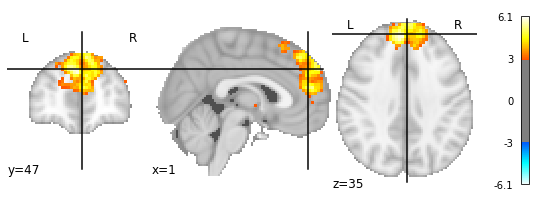

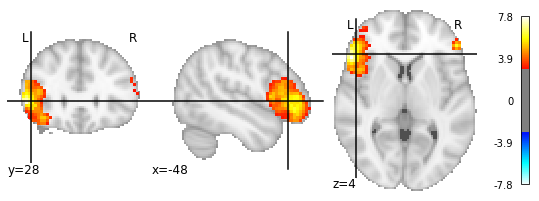

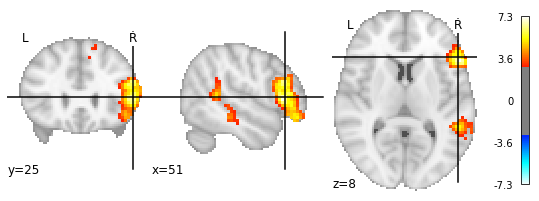

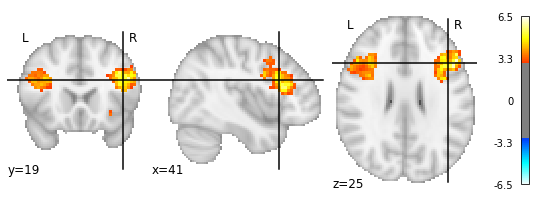

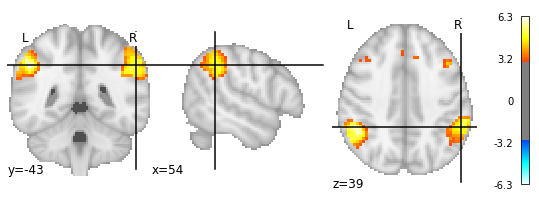

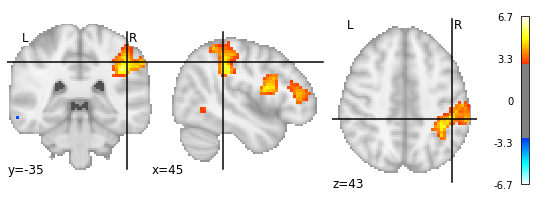

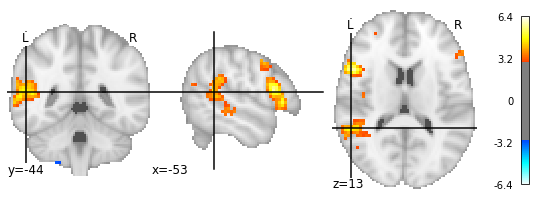

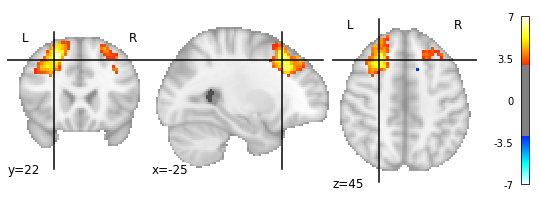

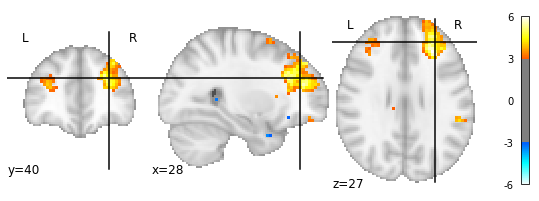

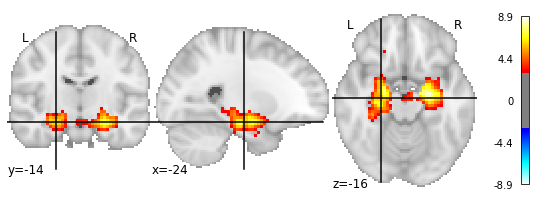

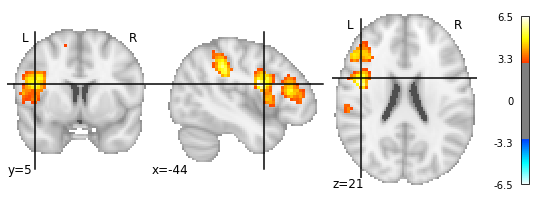

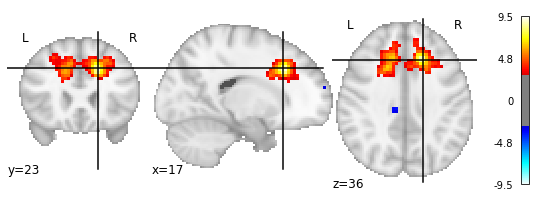

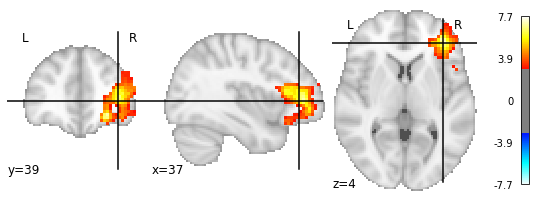

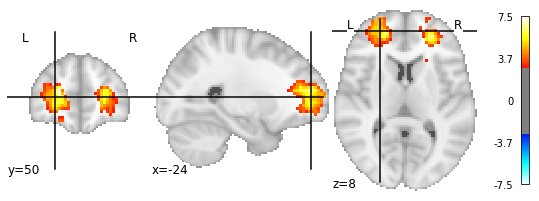

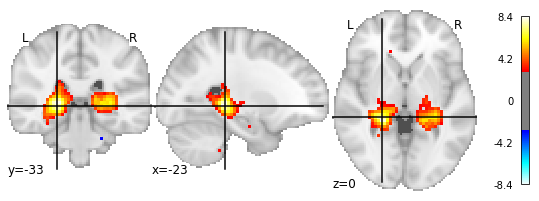

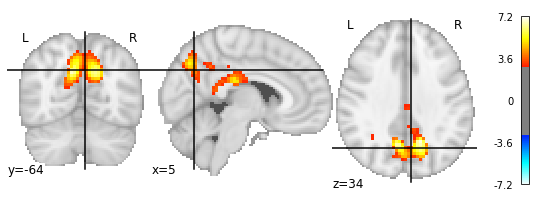

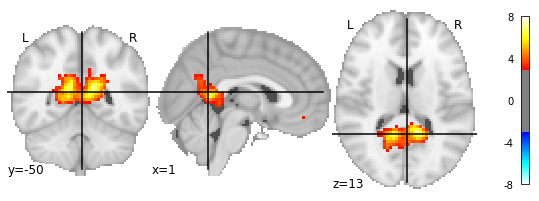

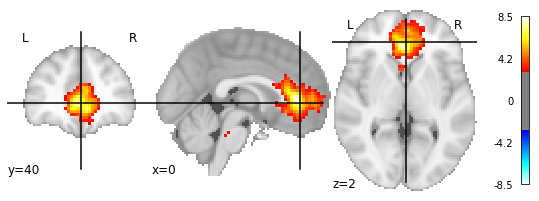

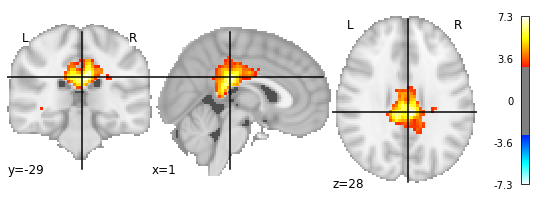

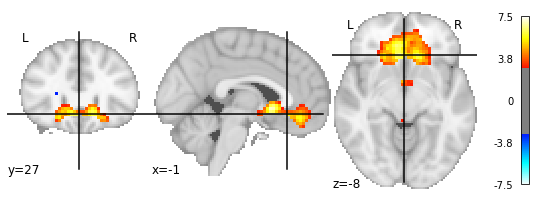

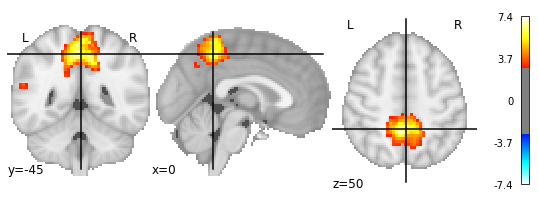

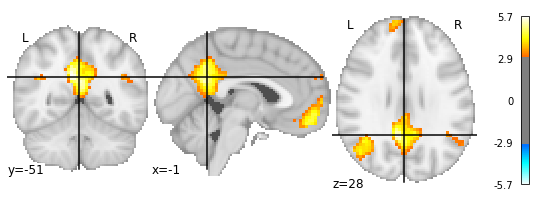

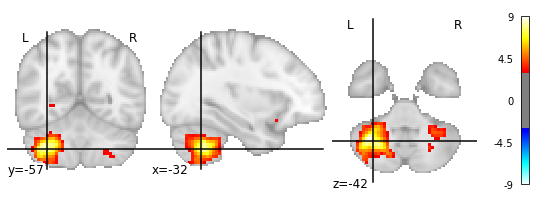

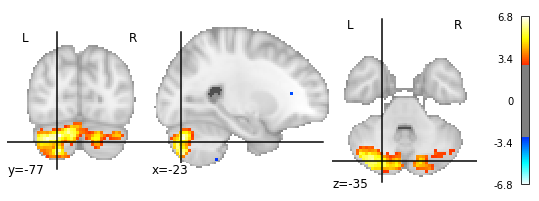

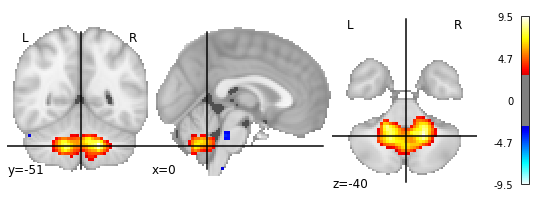

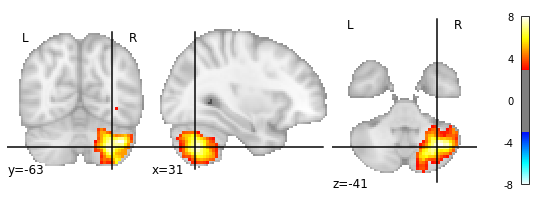

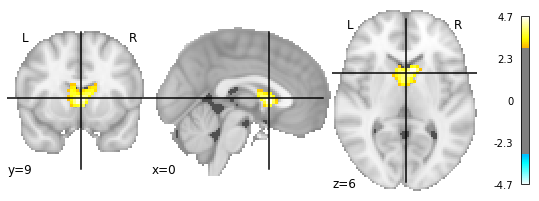

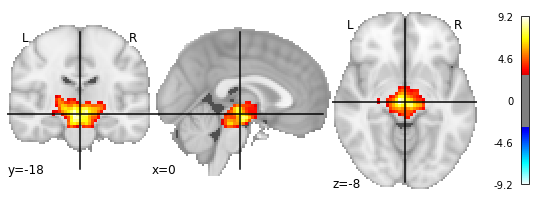

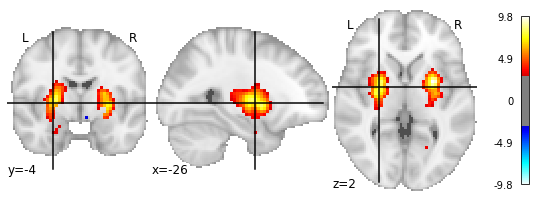

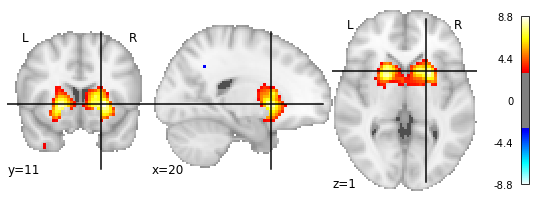

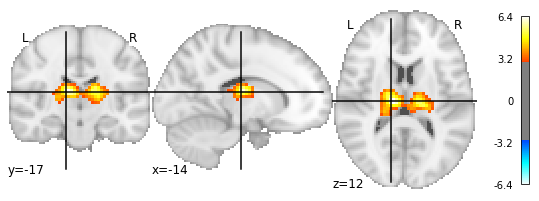

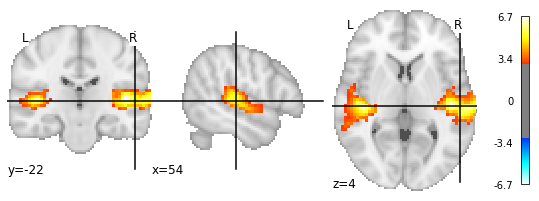

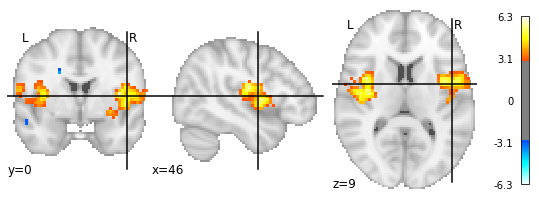

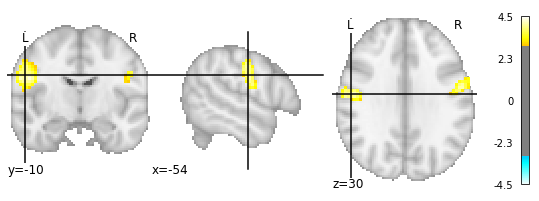

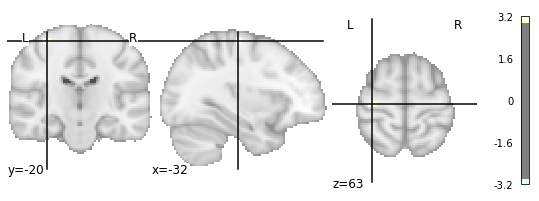

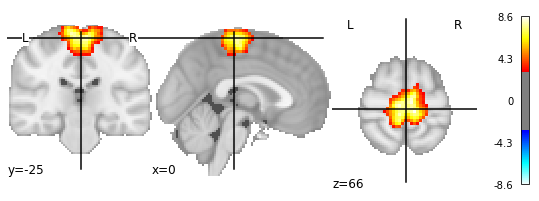

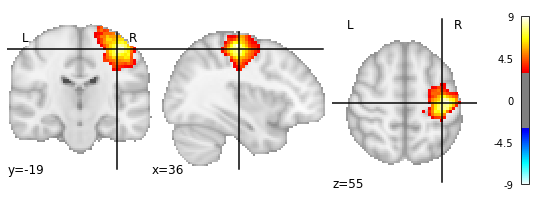

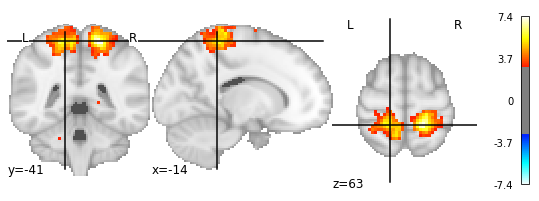

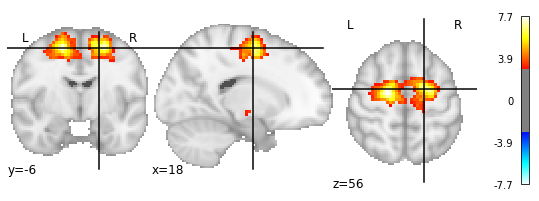

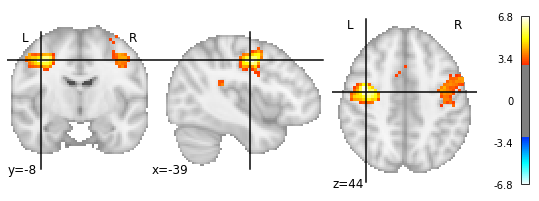

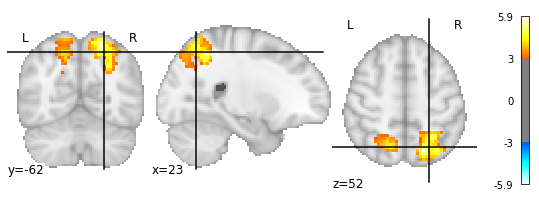

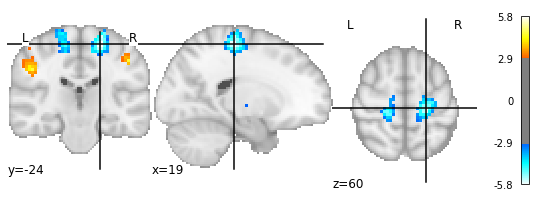

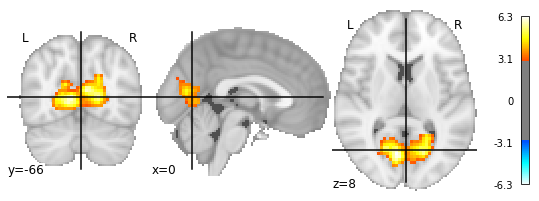

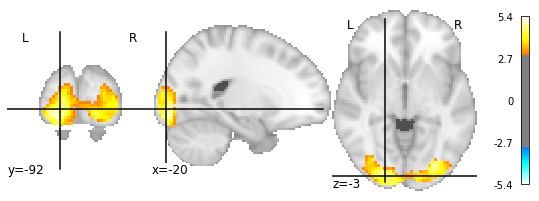

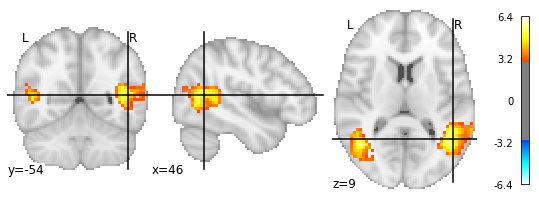

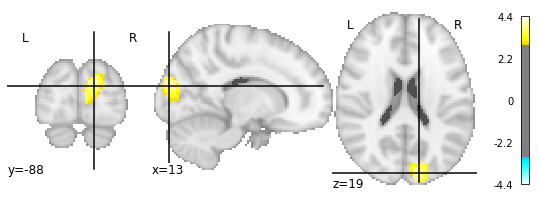

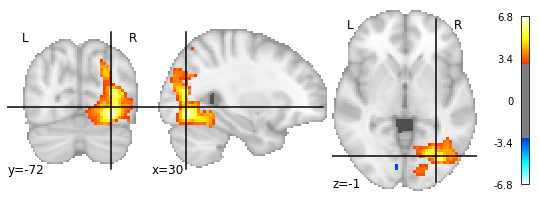

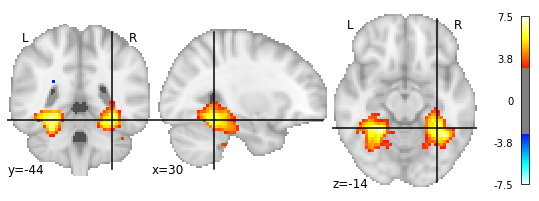

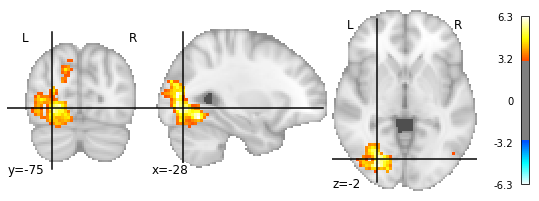

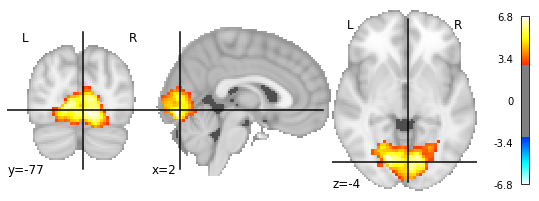

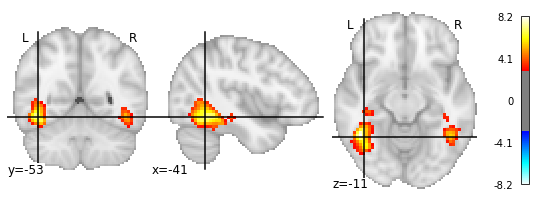

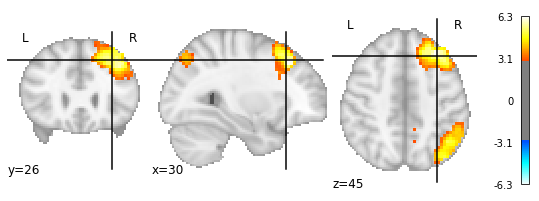

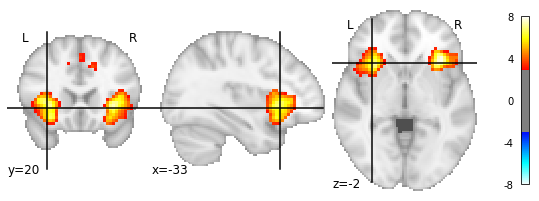

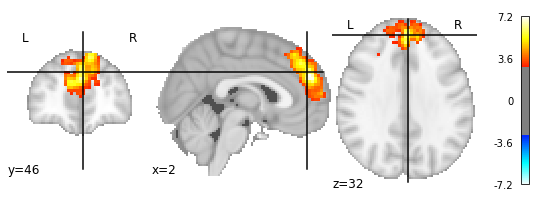

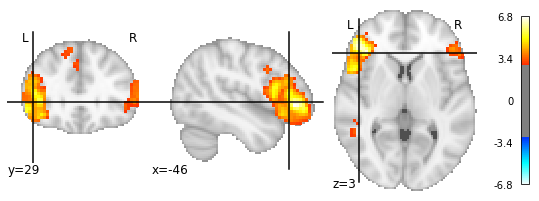

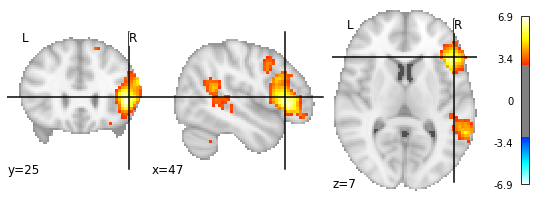

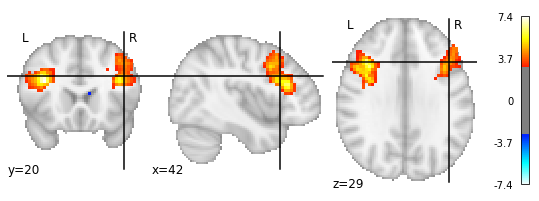

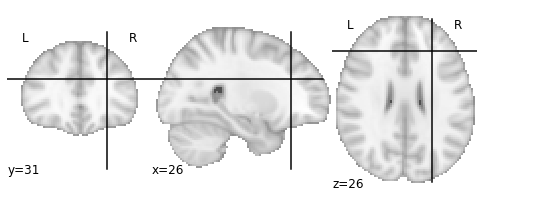

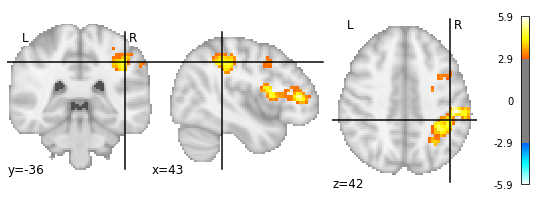

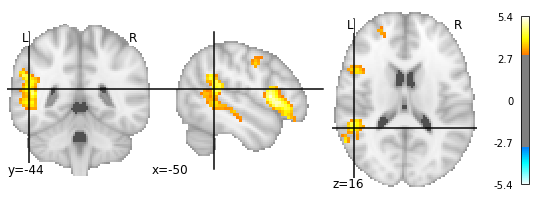

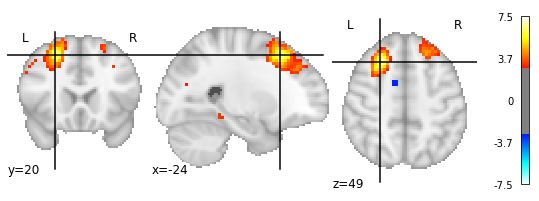

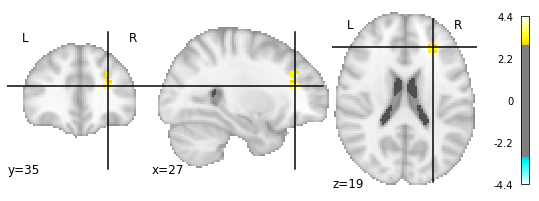

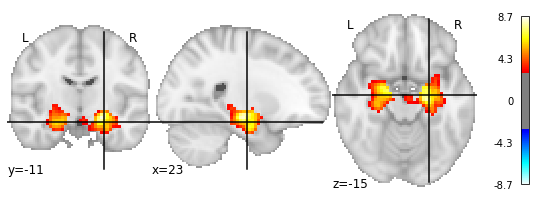

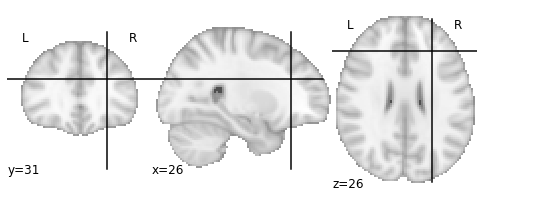

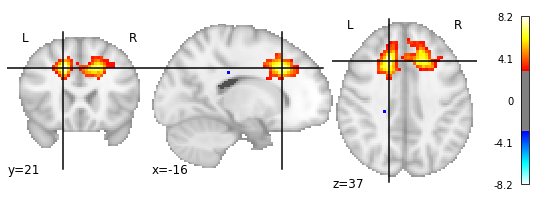

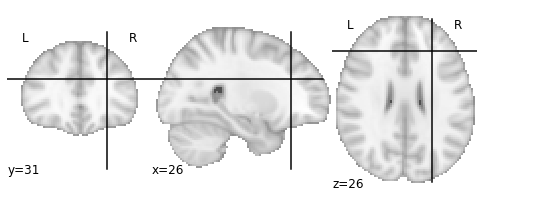

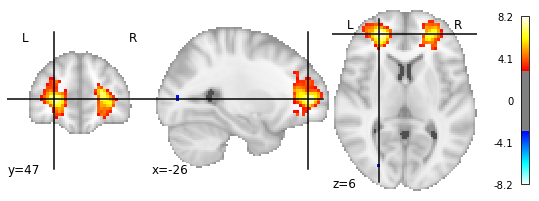

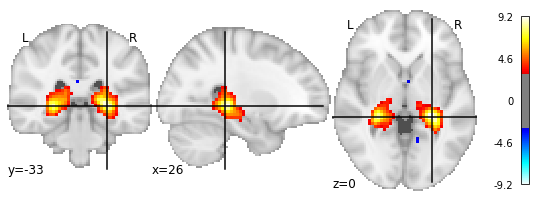

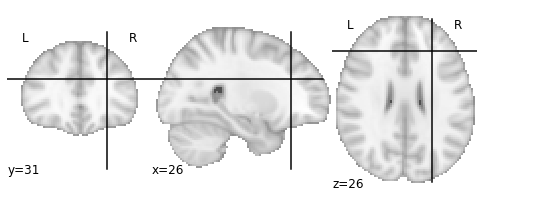

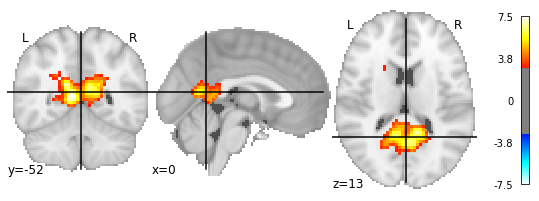

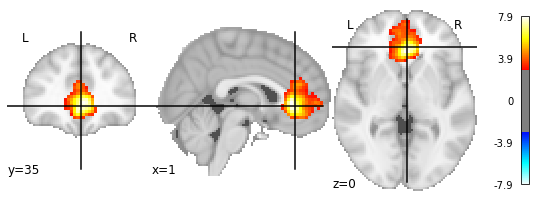

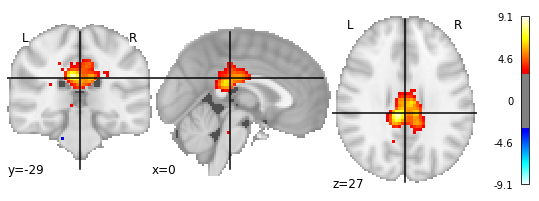

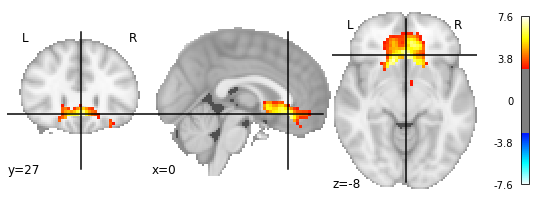

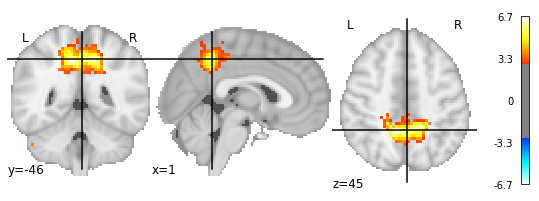

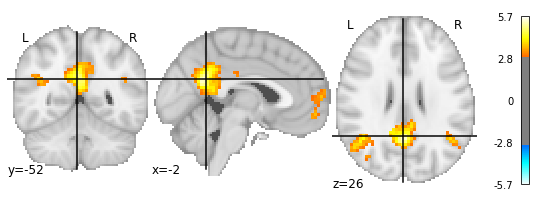

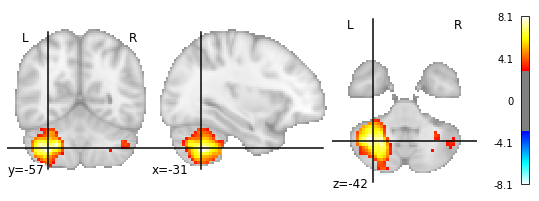

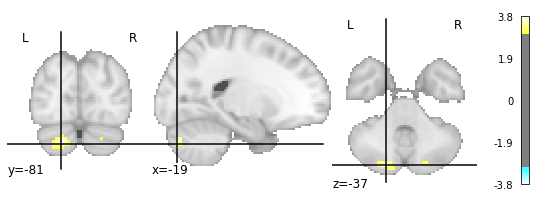

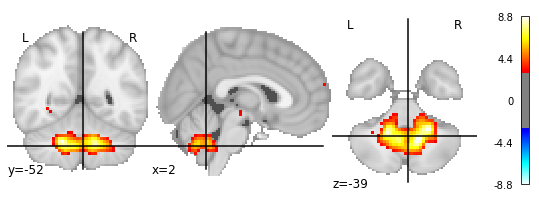

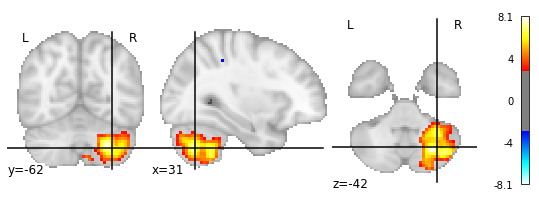

In [17]:
files = random.choices(os.listdir('../input/trends-assessment-prediction/fMRI_train/'), k = 3)
for file in files:
    subject = os.path.join('../input/trends-assessment-prediction/fMRI_train/', file)
    subject_img = load_subject(subject, mask_img)
    print("Image shape is %s" % (str(subject_img.shape)))
    num_components = subject_img.shape[-1]
    print("Detected {num_components} spatial maps".format(num_components=num_components))
    #convert to 3d image
    for img in image.iter_img(subject_img):
        # img is now an in-memory 3D img
        plotting.plot_stat_map(img, threshold=3)
    print("-"*50)

In [9]:
train = features.merge(loading_data, on='Id', how='left')
train = train.merge(fnc, on='Id', how='left')
train = train.dropna()

In [10]:
target_col = ['age', 'domain1_var1', 'domain1_var2', 'domain2_var1', 'domain2_var2']
X = train.drop(target_col, axis=1)
X.head(5)

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10001  0.006070  0.014466  0.004136  0.000658 -0.002742  0.005033   
1  10002  0.009087  0.009291  0.007049 -0.002076 -0.002227  0.004605   
2  10004  0.004675  0.000957  0.006154 -0.000429 -0.001222  0.011755   
4  10007  0.005192  0.010585  0.012160 -0.000920 -0.002255  0.011416   
5  10008  0.007745  0.009748  0.009356 -0.004219 -0.003852  0.012024   

      IC_10     IC_09     IC_18  ...  CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  \
0  0.016720  0.003484  0.001797  ...           -0.149279            0.552841   
1  0.012277  0.002946  0.004086  ...           -0.214216           -0.039792   
2  0.013010  0.000193  0.008075  ...           -0.130339            0.309540   
4  0.013838  0.001929  0.003051  ...           -0.150218            0.408926   
5  0.010205  0.002903  0.000870  ...           -0.080562            0.005339   

   CBN(4)_vs_DMN(94)  CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  \
0           0.131046           0.335446            0.394867   
1           0.143014          -0.189962            0.498373   
2           0.141469           0.030853            0.344394   
4           0.072004           0.157582            0.532046   
5          -0.386757           0.020546            0.518383   

   CBN(4)_vs_CBN(13)  CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  \
0          -0.042853           0.124627          -0.060712           0.515964   
1           0.444231           0.592438           0.028649           0.705524   
2           0.214097           0.317556           0.012435           0.665937   
4           0.355448           0.462675           0.161005           0.703679   
5           0.408071           0.465851           0.112785           0.574596   

   CBN(7)_vs_CBN(4)  
0          0.290488  
1          0.248327  
2          0.081358  
4          0.293607  
5          0.178531  

[5 rows x 1405 columns]

In [11]:
y = features
y = y.dropna()

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold,cross_val_score
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(1404,input_dim=1404,kernel_initializer='normal',activation='relu'))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(702,kernel_initializer='normal',activation='relu'))
model.add(Dense(5,kernel_initializer='normal'))

model.compile(loss='mean_absolute_error',optimizer='adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1404)              1972620   
_________________________________________________________________
dense_6 (Dense)              (None, 702)               986310    
_________________________________________________________________
dropout_2 (Dropout)          (None, 702)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 702)               493506    
_________________________________________________________________
dropout_3 (Dropout)          (None, 702)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 702)               493506    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [13]:
history = model.fit(X.iloc[:,1:], y.iloc[:,1:], epochs = 25, 
                  batch_size = 32, validation_split = 0.25, 
                  verbose = 2)

Epoch 1/25
128/128 - 1s - loss: 12.2274 - accuracy: 0.4064 - val_loss: 10.1127 - val_accuracy: 0.4731
Epoch 2/25
128/128 - 0s - loss: 10.2795 - accuracy: 0.4309 - val_loss: 9.7260 - val_accuracy: 0.4731
Epoch 3/25
128/128 - 0s - loss: 10.1510 - accuracy: 0.4317 - val_loss: 9.4117 - val_accuracy: 0.4731
Epoch 4/25
128/128 - 0s - loss: 9.9095 - accuracy: 0.4415 - val_loss: 10.0651 - val_accuracy: 0.4731
Epoch 5/25
128/128 - 1s - loss: 9.8137 - accuracy: 0.4427 - val_loss: 9.4063 - val_accuracy: 0.4731
Epoch 6/25
128/128 - 0s - loss: 9.7069 - accuracy: 0.4461 - val_loss: 9.2566 - val_accuracy: 0.4798
Epoch 7/25
128/128 - 0s - loss: 9.5667 - accuracy: 0.4540 - val_loss: 9.4371 - val_accuracy: 0.4834
Epoch 8/25
128/128 - 0s - loss: 9.5625 - accuracy: 0.4479 - val_loss: 9.5536 - val_accuracy: 0.4834
Epoch 9/25
128/128 - 0s - loss: 9.3382 - accuracy: 0.4552 - val_loss: 9.3749 - val_accuracy: 0.4776
Epoch 10/25
128/128 - 0s - loss: 9.3073 - accuracy: 0.4606 - val_loss: 9.2013 - val_accuracy: 0

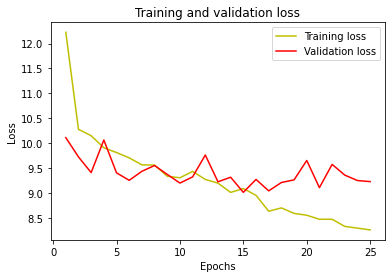

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
submission = pd.read_csv('/kaggle/input/trends-assessment-prediction/sample_submission.csv')

In [18]:
submission['ID_num'] = submission['Id'].apply(lambda x: int(x.split('_')[0]))
test = pd.DataFrame({'Id': submission['ID_num'].unique()})
del submission['ID_num']
test.head()

test = test.merge(loading_data, on='Id', how='left')
test = test.merge(fnc, on='Id', how='left')
test.head()

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10003  0.008151  0.014684  0.010444 -0.005293 -0.002913  0.015042   
1  10006  0.000334  0.005311  0.010053  0.006920 -0.000065  0.015310   
2  10010  0.007103  0.006144  0.009770 -0.002884 -0.001346  0.015651   
3  10011  0.004362  0.010240  0.010167  0.004492 -0.001623  0.017381   
4  10012 -0.007521 -0.003918  0.008434 -0.001145  0.002017  0.015065   

      IC_10     IC_09     IC_18  ...  CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  \
0  0.017745  0.003930 -0.008021  ...           -0.154941            0.136850   
1  0.016543  0.004794  0.003982  ...           -0.053606            0.240957   
2  0.011613 -0.003291  0.013423  ...           -0.244332            0.272077   
3  0.014680  0.007453  0.008786  ...           -0.099726            0.557121   
4  0.019616  0.004140 -0.003744  ...           -0.025230            0.203298   

   CBN(4)_vs_DMN(94)  CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  \
0          -0.022361           0.137625            0.677972   
1           0.270419           0.367692            0.354501   
2           0.193523           0.192254            0.563982   
3           0.042626           0.179456            0.416546   
4           0.173427           0.046047            0.561599   

   CBN(4)_vs_CBN(13)  CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  \
0           0.409412           0.563892           0.438684           0.618204   
1           0.486364           0.416908           0.285274           0.693490   
2           0.124482           0.488926           0.083368           0.774299   
3           0.445402           0.436909           0.165182           0.591561   
4           0.418268           0.609517           0.218285           0.790285   

   CBN(7)_vs_CBN(4)  
0          0.284474  
1          0.448526  
2          0.129327  
3          0.306678  
4          0.301010  

[5 rows x 1405 columns]

In [19]:
prediction = model.predict(test.iloc[:,1:])
prediction = pd.DataFrame(prediction)
prediction.columns = y.iloc[:,1:].columns
prediction.head(10)

age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  54.566288     53.658821     59.661289     52.705772     52.326859
1  62.703117     55.709236     57.318237     52.967285     47.712574
2  35.475731     47.263256     64.211128     47.922829     55.353302
3  56.416294     50.686405     56.407269     51.333878     44.790340
4  58.542183     57.120541     59.618420     52.305378     53.392429
5  56.900360     56.261753     62.704910     55.208885     54.993183
6  40.917904     49.005974     62.905170     49.483025     52.983768
7  49.668739     52.877262     60.381325     50.935799     53.450397
8  45.182899     53.051334     66.654068     53.046524     56.982166
9  62.556858     52.356552     56.130478     52.228714     42.437737

In [20]:
pred = pd.DataFrame()

for target in target_col:
    value = pd.DataFrame()
    value['Id'] = [f'{c}_{target}' for c in test['Id'].values]
    value['Predicted'] = prediction[target]
    pred = pd.concat([pred, value])

pred.head()

Id  Predicted
0  10003_age  54.566288
1  10006_age  62.703117
2  10010_age  35.475731
3  10011_age  56.416294
4  10012_age  58.542183

In [21]:
submission = pd.merge(submission, pred, on = 'Id')
submission = submission[['Id', 'Predicted_y']]
submission.columns = ['Id', 'Predicted']
submission.to_csv('submission.csv', index=False)
submission.head()

Id  Predicted
0           10003_age  54.566288
1  10003_domain1_var1  53.658821
2  10003_domain1_var2  59.661289
3  10003_domain2_var1  52.705772
4  10003_domain2_var2  52.326859

In [22]:
submission.to_csv("submission.csv", index = False)